# Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

# Loading Data

In [2]:
df=pd.read_csv('Parkinsson disease.csv')

In [3]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
df.shape

(195, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
sum(df.duplicated())

0

In [8]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

<AxesSubplot:>

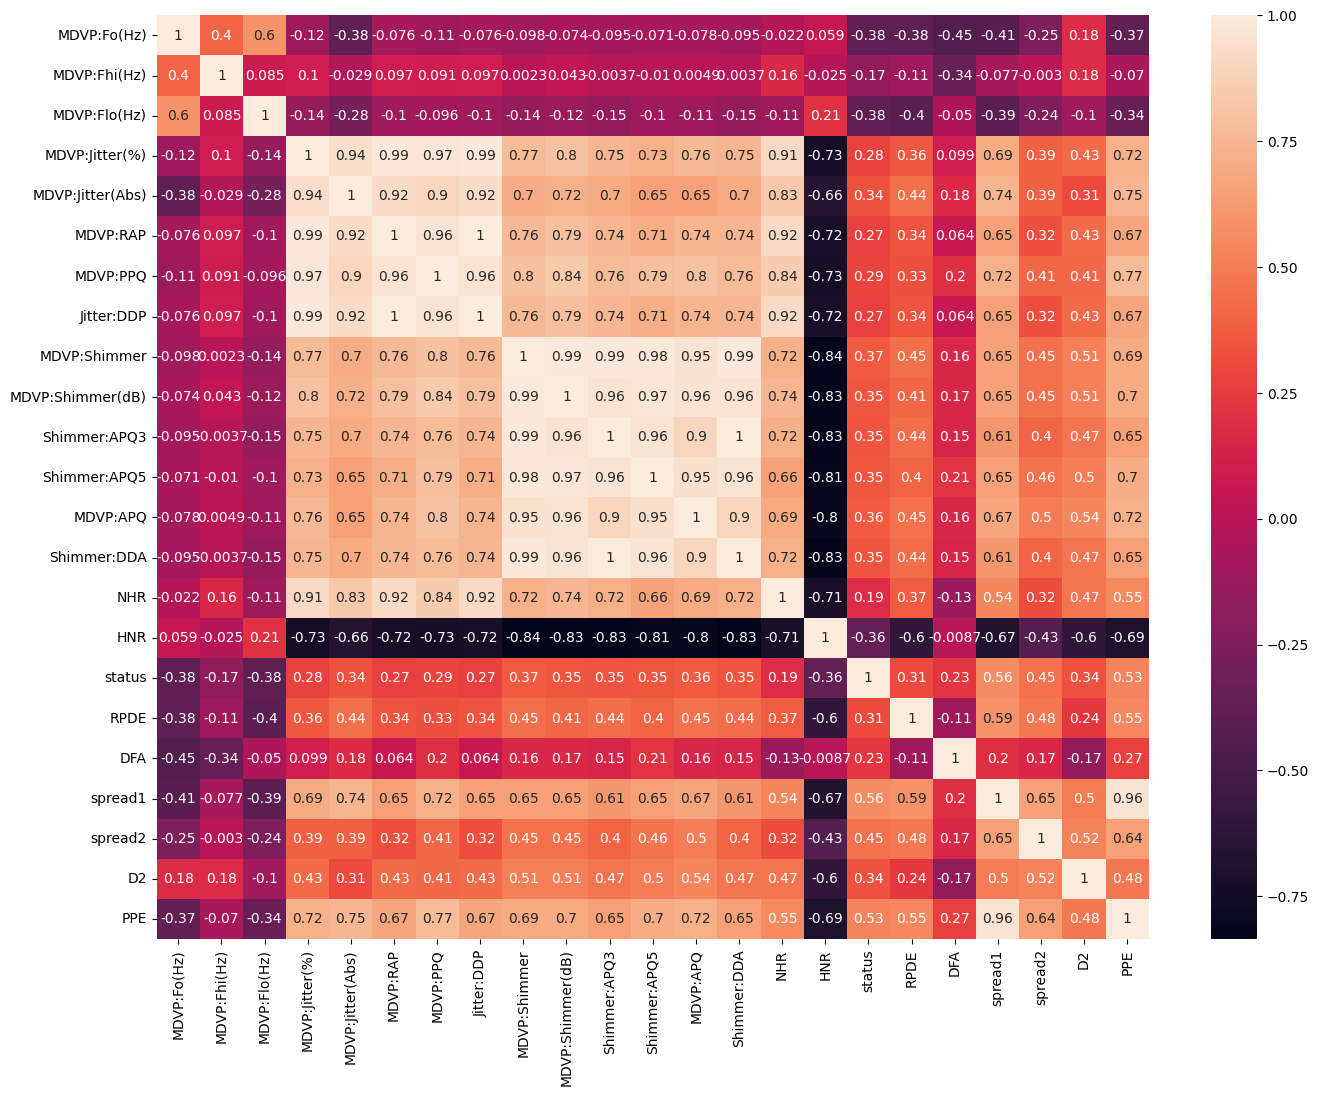

In [9]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True)

In [10]:
x=df.drop(['status','name'],axis=1)
y=df['status']

array([[<AxesSubplot:title={'center':'MDVP:Fo(Hz)'}>,
        <AxesSubplot:title={'center':'MDVP:Fhi(Hz)'}>,
        <AxesSubplot:title={'center':'MDVP:Flo(Hz)'}>,
        <AxesSubplot:title={'center':'MDVP:Jitter(%)'}>,
        <AxesSubplot:title={'center':'MDVP:Jitter(Abs)'}>],
       [<AxesSubplot:title={'center':'MDVP:RAP'}>,
        <AxesSubplot:title={'center':'MDVP:PPQ'}>,
        <AxesSubplot:title={'center':'Jitter:DDP'}>,
        <AxesSubplot:title={'center':'MDVP:Shimmer'}>,
        <AxesSubplot:title={'center':'MDVP:Shimmer(dB)'}>],
       [<AxesSubplot:title={'center':'Shimmer:APQ3'}>,
        <AxesSubplot:title={'center':'Shimmer:APQ5'}>,
        <AxesSubplot:title={'center':'MDVP:APQ'}>,
        <AxesSubplot:title={'center':'Shimmer:DDA'}>,
        <AxesSubplot:title={'center':'NHR'}>],
       [<AxesSubplot:title={'center':'HNR'}>,
        <AxesSubplot:title={'center':'RPDE'}>,
        <AxesSubplot:title={'center':'DFA'}>,
        <AxesSubplot:title={'center':'spread1'}>

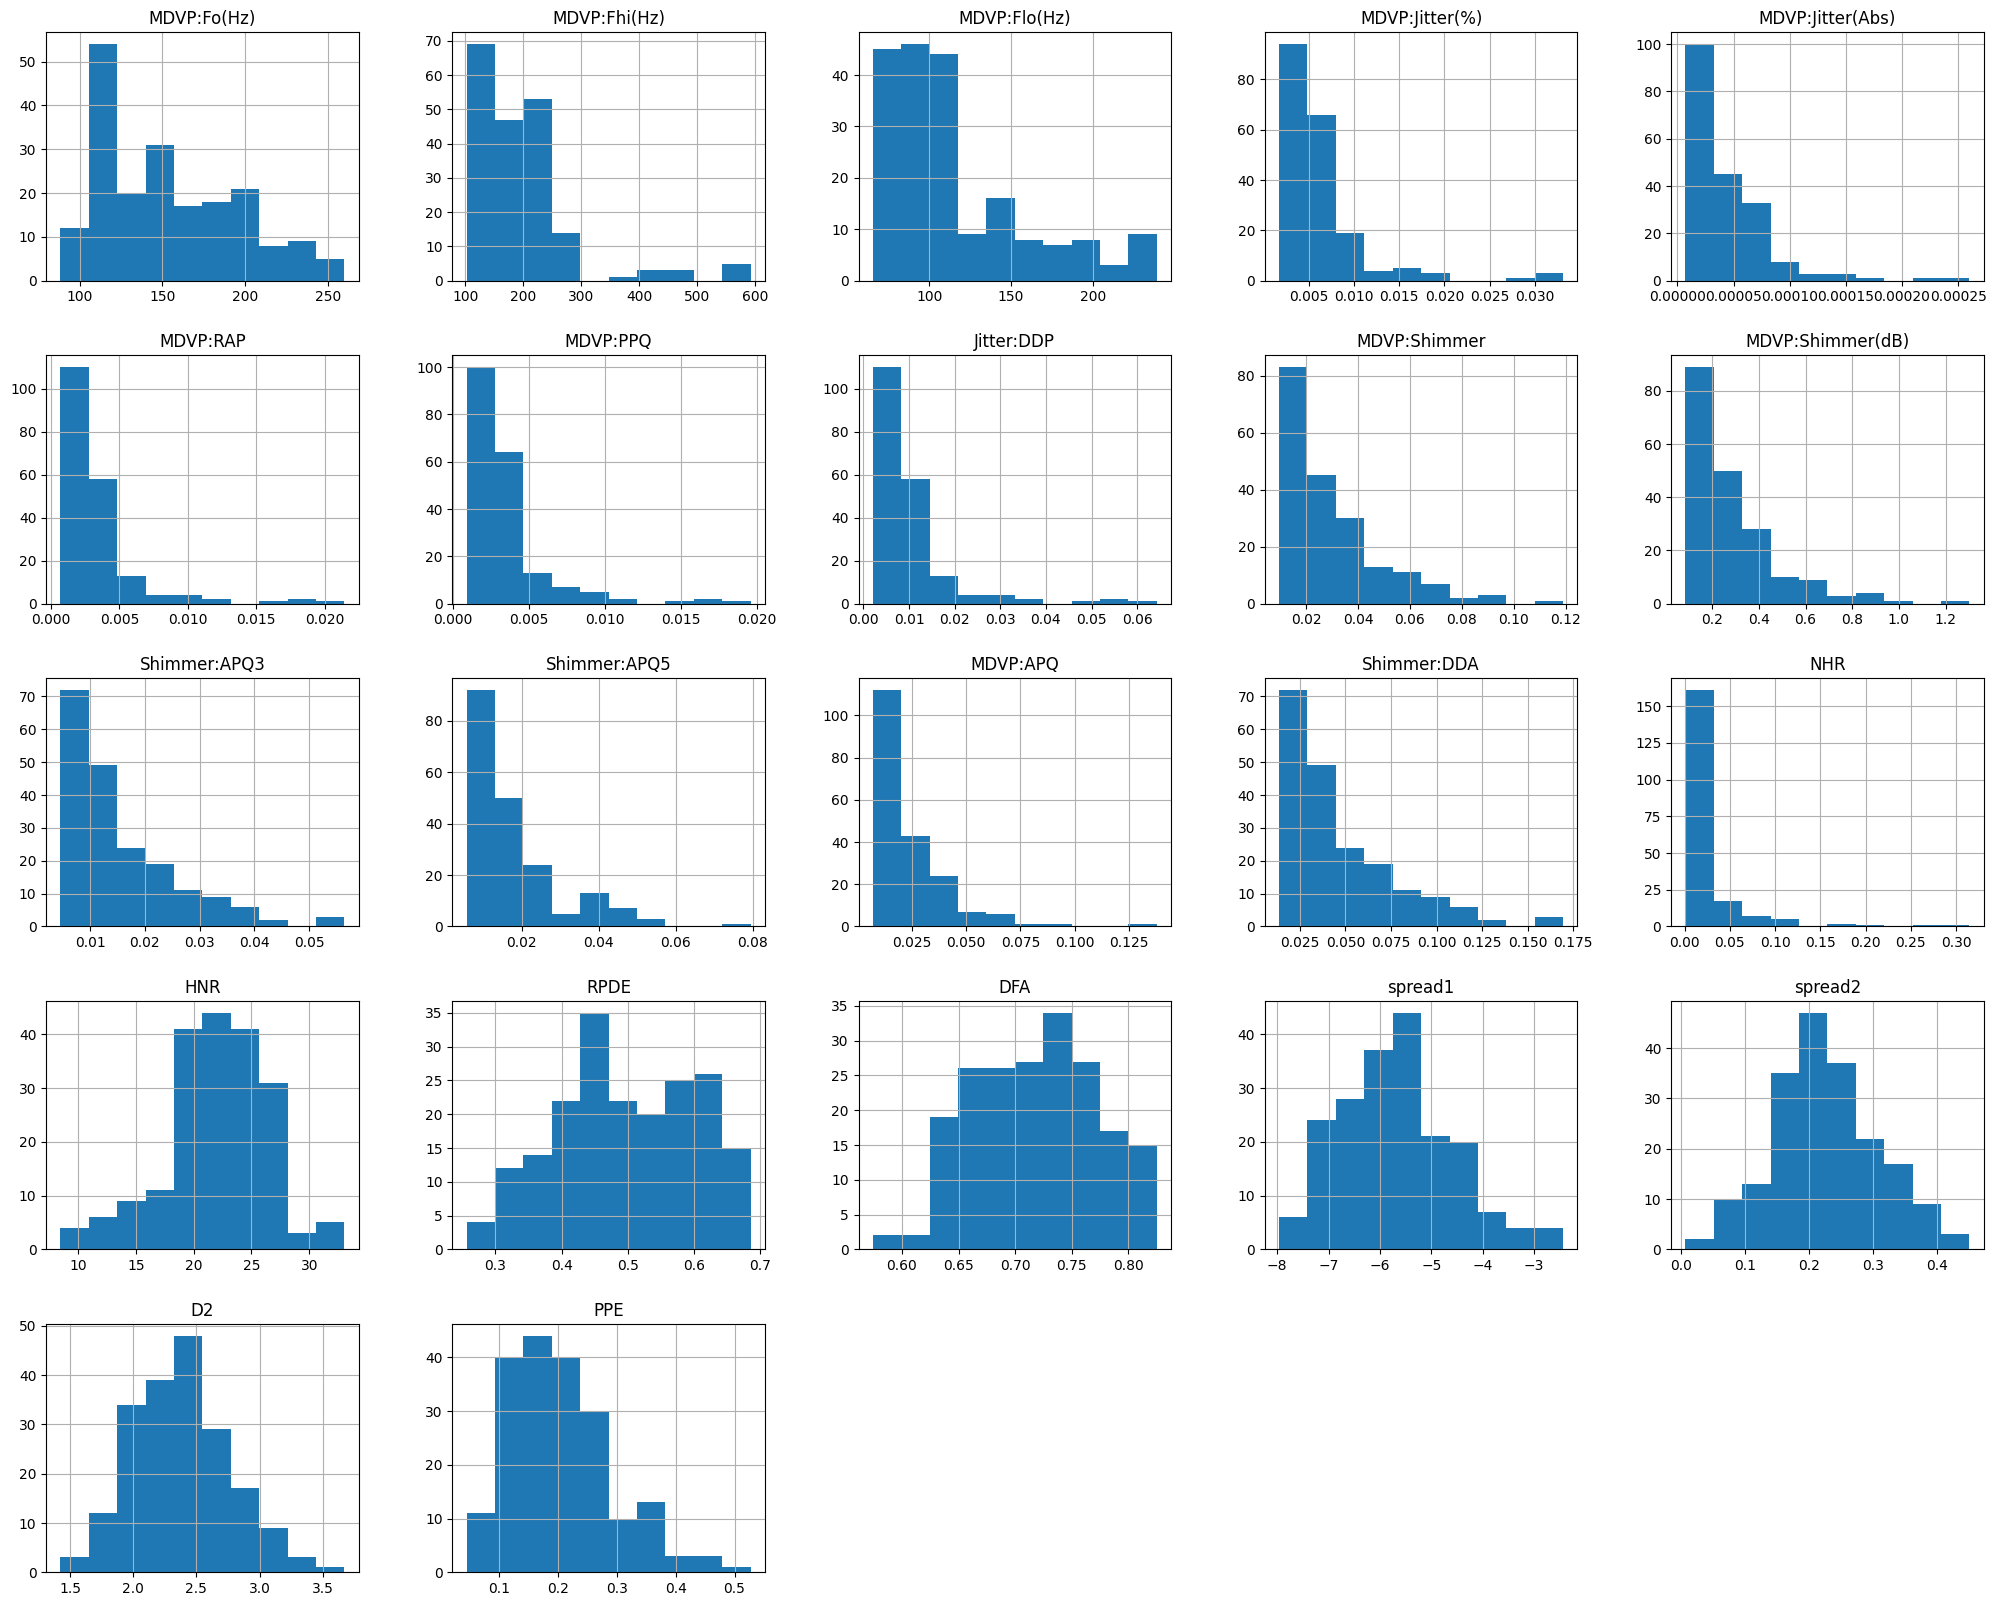

In [11]:
x.hist(figsize=(25,20))

In [12]:
df=df[df['MDVP:Fhi(Hz)']<=300]
df=df[df['MDVP:Jitter(%)']<=0.021]
df=df[df['MDVP:RAP']<=0.012]
df=df[df['MDVP:PPQ']<=0.012]
df=df[df['Jitter:DDP']<=0.032]
df=df[df['MDVP:Shimmer']<=0.1]
df=df[df['MDVP:Shimmer(dB)']<=1.0]
df=df[df['Shimmer:APQ3']<=0.045]
df=df[df['Shimmer:APQ5']<=0.05]
df=df[df['MDVP:APQ']<=0.075]
df=df[df['Shimmer:DDA']<=0.125]
df=df[df['NHR']<=0.15]

In [13]:
df.shape

(175, 24)

In [14]:
x=df.drop(['status','name'],axis=1)
y=df['status']

In [15]:
x.shape

(175, 22)

In [16]:
y.shape

(175,)

# Model Splitting

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
xtrain.shape

(140, 22)

In [19]:
xtest.shape

(35, 22)

In [20]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xtrain=ss.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)

# Model Training

### Using XGBoost

In [21]:
from xgboost import XGBClassifier

model=XGBClassifier()
model.fit(xtrain,ytrain)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [22]:
pred1=model.predict(xtrain)

In [23]:
acc_score=accuracy_score(ytrain,pred1)
acc_score

1.0

In [24]:
pred2=model.predict(xtest)
acc_score=accuracy_score(ytest,pred2)
print("Accuracy score:",acc_score*100)

Accuracy score: 94.28571428571428


In [25]:
pd.DataFrame({'actual':ytest,'predict':pred2})

,actual,predict
55,1,1
170,0,0
64,0,0
56,1,1
133,1,1
107,1,1
7,1,0
174,0,1
141,1,1
92,1,1


### Using Catboost model

In [26]:
import catboost as cb

In [27]:
train_data=cb.Pool(xtrain,ytrain)
test_data=cb.Pool(xtest,ytest)

In [28]:
model=cb.CatBoostRegressor(loss_function='RMSE')

In [29]:
grid={'iterations':[100,110],
     'learning_rate':[0.03,0.1],
     'depth':[2,4,6,8]}

model.grid_search(grid,train_data)

0:	learn: 0.8282467	test: 0.9067232	best: 0.9067232 (0)	total: 128ms	remaining: 12.6s
1:	learn: 0.8102893	test: 0.8887854	best: 0.8887854 (1)	total: 129ms	remaining: 6.3s
2:	learn: 0.7942002	test: 0.8714588	best: 0.8714588 (2)	total: 129ms	remaining: 4.17s
3:	learn: 0.7771348	test: 0.8522594	best: 0.8522594 (3)	total: 130ms	remaining: 3.11s
4:	learn: 0.7612185	test: 0.8343079	best: 0.8343079 (4)	total: 130ms	remaining: 2.47s
5:	learn: 0.7465652	test: 0.8183678	best: 0.8183678 (5)	total: 130ms	remaining: 2.04s
6:	learn: 0.7323242	test: 0.8024674	best: 0.8024674 (6)	total: 130ms	remaining: 1.73s
7:	learn: 0.7189750	test: 0.7870025	best: 0.7870025 (7)	total: 131ms	remaining: 1.5s
8:	learn: 0.7040334	test: 0.7706442	best: 0.7706442 (8)	total: 131ms	remaining: 1.32s
9:	learn: 0.6915989	test: 0.7563634	best: 0.7563634 (9)	total: 131ms	remaining: 1.18s
10:	learn: 0.6783365	test: 0.7412772	best: 0.7412772 (10)	total: 132ms	remaining: 1.06s
11:	learn: 0.6662756	test: 0.7278101	best: 0.7278101 (

61:	learn: 0.3282113	test: 0.3805798	best: 0.3805798 (61)	total: 44.7ms	remaining: 27.4ms
62:	learn: 0.3239266	test: 0.3763310	best: 0.3763310 (62)	total: 46.2ms	remaining: 27.1ms
63:	learn: 0.3202260	test: 0.3724462	best: 0.3724462 (63)	total: 47ms	remaining: 26.4ms
64:	learn: 0.3184091	test: 0.3702668	best: 0.3702668 (64)	total: 47.6ms	remaining: 25.6ms
65:	learn: 0.3151049	test: 0.3679585	best: 0.3679585 (65)	total: 48.3ms	remaining: 24.9ms
66:	learn: 0.3125623	test: 0.3656563	best: 0.3656563 (66)	total: 48.9ms	remaining: 24.1ms
67:	learn: 0.3099377	test: 0.3633192	best: 0.3633192 (67)	total: 49.5ms	remaining: 23.3ms
68:	learn: 0.3065311	test: 0.3611767	best: 0.3611767 (68)	total: 50.1ms	remaining: 22.5ms
69:	learn: 0.3040231	test: 0.3592602	best: 0.3592602 (69)	total: 50.7ms	remaining: 21.7ms
70:	learn: 0.3010357	test: 0.3577043	best: 0.3577043 (70)	total: 51.1ms	remaining: 20.9ms
71:	learn: 0.2989668	test: 0.3565507	best: 0.3565507 (71)	total: 51.7ms	remaining: 20.1ms
72:	learn: 0

81:	learn: 0.2753670	test: 0.3359672	best: 0.3359672 (81)	total: 93.6ms	remaining: 31.9ms
82:	learn: 0.2734141	test: 0.3341927	best: 0.3341927 (82)	total: 95.1ms	remaining: 30.9ms
83:	learn: 0.2708584	test: 0.3324217	best: 0.3324217 (83)	total: 96.3ms	remaining: 29.8ms
84:	learn: 0.2683264	test: 0.3309170	best: 0.3309170 (84)	total: 97.4ms	remaining: 28.6ms
85:	learn: 0.2661897	test: 0.3295685	best: 0.3295685 (85)	total: 98.1ms	remaining: 27.4ms
86:	learn: 0.2633192	test: 0.3293263	best: 0.3293263 (86)	total: 98.8ms	remaining: 26.1ms
87:	learn: 0.2607683	test: 0.3276512	best: 0.3276512 (87)	total: 99.4ms	remaining: 24.9ms
88:	learn: 0.2589088	test: 0.3259705	best: 0.3259705 (88)	total: 102ms	remaining: 24ms
89:	learn: 0.2576542	test: 0.3251281	best: 0.3251281 (89)	total: 103ms	remaining: 22.9ms
90:	learn: 0.2551796	test: 0.3234050	best: 0.3234050 (90)	total: 104ms	remaining: 21.6ms
91:	learn: 0.2524580	test: 0.3222849	best: 0.3222849 (91)	total: 104ms	remaining: 20.4ms
92:	learn: 0.250

46:	learn: 0.3986749	test: 0.4738708	best: 0.4738708 (46)	total: 87.4ms	remaining: 98.6ms
47:	learn: 0.3934319	test: 0.4693890	best: 0.4693890 (47)	total: 89.2ms	remaining: 96.6ms
48:	learn: 0.3870396	test: 0.4645737	best: 0.4645737 (48)	total: 90.8ms	remaining: 94.5ms
49:	learn: 0.3819224	test: 0.4593277	best: 0.4593277 (49)	total: 92.3ms	remaining: 92.3ms
50:	learn: 0.3777143	test: 0.4548850	best: 0.4548850 (50)	total: 93.6ms	remaining: 89.9ms
51:	learn: 0.3733935	test: 0.4505783	best: 0.4505783 (51)	total: 95ms	remaining: 87.7ms
52:	learn: 0.3690192	test: 0.4462670	best: 0.4462670 (52)	total: 96.4ms	remaining: 85.5ms
53:	learn: 0.3633851	test: 0.4401675	best: 0.4401675 (53)	total: 97.8ms	remaining: 83.3ms
54:	learn: 0.3589115	test: 0.4354196	best: 0.4354196 (54)	total: 99.9ms	remaining: 81.7ms
55:	learn: 0.3548495	test: 0.4320084	best: 0.4320084 (55)	total: 101ms	remaining: 79.7ms
56:	learn: 0.3508698	test: 0.4274133	best: 0.4274133 (56)	total: 103ms	remaining: 77.5ms
57:	learn: 0.3

53:	learn: 0.1105258	test: 0.2877833	best: 0.2877833 (53)	total: 87.2ms	remaining: 74.3ms
54:	learn: 0.1078732	test: 0.2870630	best: 0.2870630 (54)	total: 88.8ms	remaining: 72.7ms
55:	learn: 0.1059848	test: 0.2851500	best: 0.2851500 (55)	total: 90.9ms	remaining: 71.4ms
56:	learn: 0.1033527	test: 0.2859222	best: 0.2851500 (55)	total: 92.8ms	remaining: 70ms
57:	learn: 0.1001700	test: 0.2860472	best: 0.2851500 (55)	total: 94.7ms	remaining: 68.6ms
58:	learn: 0.0983585	test: 0.2849530	best: 0.2849530 (58)	total: 96.6ms	remaining: 67.2ms
59:	learn: 0.0952468	test: 0.2833975	best: 0.2833975 (59)	total: 98.3ms	remaining: 65.5ms
60:	learn: 0.0926785	test: 0.2827719	best: 0.2827719 (60)	total: 99.9ms	remaining: 63.9ms
61:	learn: 0.0904137	test: 0.2831906	best: 0.2827719 (60)	total: 102ms	remaining: 62.6ms
62:	learn: 0.0883492	test: 0.2837068	best: 0.2827719 (60)	total: 105ms	remaining: 61.4ms
63:	learn: 0.0873178	test: 0.2840470	best: 0.2827719 (60)	total: 106ms	remaining: 59.9ms
64:	learn: 0.08

47:	learn: 0.3934319	test: 0.4693890	best: 0.4693890 (47)	total: 110ms	remaining: 142ms
48:	learn: 0.3870396	test: 0.4645737	best: 0.4645737 (48)	total: 112ms	remaining: 140ms
49:	learn: 0.3819224	test: 0.4593277	best: 0.4593277 (49)	total: 114ms	remaining: 137ms
50:	learn: 0.3777143	test: 0.4548850	best: 0.4548850 (50)	total: 115ms	remaining: 133ms
51:	learn: 0.3733935	test: 0.4505783	best: 0.4505783 (51)	total: 117ms	remaining: 130ms
52:	learn: 0.3690192	test: 0.4462670	best: 0.4462670 (52)	total: 118ms	remaining: 127ms
53:	learn: 0.3633851	test: 0.4401675	best: 0.4401675 (53)	total: 120ms	remaining: 124ms
54:	learn: 0.3589115	test: 0.4354196	best: 0.4354196 (54)	total: 121ms	remaining: 121ms
55:	learn: 0.3548495	test: 0.4320084	best: 0.4320084 (55)	total: 122ms	remaining: 118ms
56:	learn: 0.3508698	test: 0.4274133	best: 0.4274133 (56)	total: 124ms	remaining: 115ms
57:	learn: 0.3468771	test: 0.4232889	best: 0.4232889 (57)	total: 126ms	remaining: 113ms
58:	learn: 0.3422817	test: 0.418

39:	learn: 0.1600900	test: 0.3035968	best: 0.3035968 (39)	total: 78.2ms	remaining: 137ms
40:	learn: 0.1543066	test: 0.3009858	best: 0.3009858 (40)	total: 79.9ms	remaining: 134ms
41:	learn: 0.1507607	test: 0.3017797	best: 0.3009858 (40)	total: 81.4ms	remaining: 132ms
42:	learn: 0.1467169	test: 0.3007863	best: 0.3007863 (42)	total: 83.2ms	remaining: 130ms
43:	learn: 0.1407339	test: 0.2990611	best: 0.2990611 (43)	total: 84.7ms	remaining: 127ms
44:	learn: 0.1365581	test: 0.2980487	best: 0.2980487 (44)	total: 86.3ms	remaining: 125ms
45:	learn: 0.1346831	test: 0.2977889	best: 0.2977889 (45)	total: 87.7ms	remaining: 122ms
46:	learn: 0.1307736	test: 0.2977978	best: 0.2977889 (45)	total: 89.2ms	remaining: 120ms
47:	learn: 0.1269756	test: 0.2943785	best: 0.2943785 (47)	total: 90.6ms	remaining: 117ms
48:	learn: 0.1234756	test: 0.2934943	best: 0.2934943 (48)	total: 92ms	remaining: 114ms
49:	learn: 0.1212796	test: 0.2922455	best: 0.2922455 (49)	total: 93.3ms	remaining: 112ms
50:	learn: 0.1183000	te

31:	learn: 0.5050514	test: 0.6034855	best: 0.6034855 (31)	total: 275ms	remaining: 585ms
32:	learn: 0.4972212	test: 0.5976642	best: 0.5976642 (32)	total: 284ms	remaining: 576ms
33:	learn: 0.4913282	test: 0.5943182	best: 0.5943182 (33)	total: 293ms	remaining: 568ms
34:	learn: 0.4842213	test: 0.5887917	best: 0.5887917 (34)	total: 301ms	remaining: 559ms
35:	learn: 0.4769448	test: 0.5812005	best: 0.5812005 (35)	total: 310ms	remaining: 552ms
36:	learn: 0.4699066	test: 0.5740116	best: 0.5740116 (36)	total: 312ms	remaining: 531ms
37:	learn: 0.4618748	test: 0.5645215	best: 0.5645215 (37)	total: 313ms	remaining: 510ms
38:	learn: 0.4545546	test: 0.5580948	best: 0.5580948 (38)	total: 320ms	remaining: 501ms
39:	learn: 0.4466036	test: 0.5522839	best: 0.5522839 (39)	total: 329ms	remaining: 494ms
40:	learn: 0.4412022	test: 0.5473836	best: 0.5473836 (40)	total: 337ms	remaining: 484ms
41:	learn: 0.4358103	test: 0.5430041	best: 0.5430041 (41)	total: 345ms	remaining: 477ms
42:	learn: 0.4299252	test: 0.537

37:	learn: 0.1561201	test: 0.3324636	best: 0.3324636 (37)	total: 306ms	remaining: 499ms
38:	learn: 0.1511671	test: 0.3302401	best: 0.3302401 (38)	total: 313ms	remaining: 490ms
39:	learn: 0.1471742	test: 0.3281829	best: 0.3281829 (39)	total: 322ms	remaining: 482ms
40:	learn: 0.1419128	test: 0.3280547	best: 0.3280547 (40)	total: 329ms	remaining: 473ms
41:	learn: 0.1371444	test: 0.3267033	best: 0.3267033 (41)	total: 338ms	remaining: 467ms
42:	learn: 0.1322963	test: 0.3230929	best: 0.3230929 (42)	total: 346ms	remaining: 459ms
43:	learn: 0.1289739	test: 0.3223014	best: 0.3223014 (43)	total: 355ms	remaining: 451ms
44:	learn: 0.1250647	test: 0.3193509	best: 0.3193509 (44)	total: 366ms	remaining: 447ms
45:	learn: 0.1210187	test: 0.3190040	best: 0.3190040 (45)	total: 378ms	remaining: 444ms
46:	learn: 0.1170829	test: 0.3177733	best: 0.3177733 (46)	total: 392ms	remaining: 442ms
47:	learn: 0.1135879	test: 0.3169970	best: 0.3169970 (47)	total: 400ms	remaining: 433ms
48:	learn: 0.1102925	test: 0.317

35:	learn: 0.4769448	test: 0.5812005	best: 0.5812005 (35)	total: 190ms	remaining: 391ms
36:	learn: 0.4699066	test: 0.5740116	best: 0.5740116 (36)	total: 191ms	remaining: 377ms
37:	learn: 0.4618748	test: 0.5645215	best: 0.5645215 (37)	total: 192ms	remaining: 363ms
38:	learn: 0.4545546	test: 0.5580948	best: 0.5580948 (38)	total: 196ms	remaining: 358ms
39:	learn: 0.4466036	test: 0.5522839	best: 0.5522839 (39)	total: 203ms	remaining: 354ms
40:	learn: 0.4412022	test: 0.5473836	best: 0.5473836 (40)	total: 208ms	remaining: 349ms
41:	learn: 0.4358103	test: 0.5430041	best: 0.5430041 (41)	total: 213ms	remaining: 344ms
42:	learn: 0.4299252	test: 0.5376293	best: 0.5376293 (42)	total: 219ms	remaining: 340ms
43:	learn: 0.4228773	test: 0.5310056	best: 0.5310056 (43)	total: 224ms	remaining: 336ms
44:	learn: 0.4165062	test: 0.5230271	best: 0.5230271 (44)	total: 225ms	remaining: 325ms
45:	learn: 0.4102939	test: 0.5177685	best: 0.5177685 (45)	total: 230ms	remaining: 320ms
46:	learn: 0.4042674	test: 0.512

44:	learn: 0.1250647	test: 0.3193509	best: 0.3193509 (44)	total: 234ms	remaining: 339ms
45:	learn: 0.1210187	test: 0.3190040	best: 0.3190040 (45)	total: 241ms	remaining: 335ms
46:	learn: 0.1170829	test: 0.3177733	best: 0.3177733 (46)	total: 246ms	remaining: 330ms
47:	learn: 0.1135879	test: 0.3169970	best: 0.3169970 (47)	total: 252ms	remaining: 325ms
48:	learn: 0.1102925	test: 0.3173767	best: 0.3169970 (47)	total: 258ms	remaining: 321ms
49:	learn: 0.1070316	test: 0.3171399	best: 0.3169970 (47)	total: 265ms	remaining: 318ms
50:	learn: 0.1035327	test: 0.3168706	best: 0.3168706 (50)	total: 272ms	remaining: 315ms
51:	learn: 0.0991225	test: 0.3153369	best: 0.3153369 (51)	total: 278ms	remaining: 311ms
52:	learn: 0.0961416	test: 0.3145252	best: 0.3145252 (52)	total: 285ms	remaining: 306ms
53:	learn: 0.0930479	test: 0.3141746	best: 0.3141746 (53)	total: 290ms	remaining: 301ms
54:	learn: 0.0903749	test: 0.3127015	best: 0.3127015 (54)	total: 296ms	remaining: 296ms
55:	learn: 0.0871128	test: 0.311

63:	learn: 0.1160673	test: 0.2989641	best: 0.2989641 (63)	total: 28.5ms	remaining: 20.5ms
64:	learn: 0.1142096	test: 0.2988710	best: 0.2988710 (64)	total: 29.1ms	remaining: 20.2ms
65:	learn: 0.1136351	test: 0.2988833	best: 0.2988710 (64)	total: 29.6ms	remaining: 19.7ms
66:	learn: 0.1104865	test: 0.2971006	best: 0.2971006 (66)	total: 30.1ms	remaining: 19.3ms
67:	learn: 0.1071689	test: 0.2969882	best: 0.2969882 (67)	total: 30.5ms	remaining: 18.9ms
68:	learn: 0.1059607	test: 0.2965770	best: 0.2965770 (68)	total: 31ms	remaining: 18.4ms
69:	learn: 0.1026232	test: 0.2952305	best: 0.2952305 (69)	total: 31.5ms	remaining: 18ms
70:	learn: 0.0999216	test: 0.2952356	best: 0.2952305 (69)	total: 32.1ms	remaining: 17.6ms
71:	learn: 0.0982043	test: 0.2949163	best: 0.2949163 (71)	total: 32.5ms	remaining: 17.2ms
72:	learn: 0.0966542	test: 0.2951644	best: 0.2949163 (71)	total: 33ms	remaining: 16.7ms
73:	learn: 0.0959428	test: 0.2949866	best: 0.2949163 (71)	total: 33.4ms	remaining: 16.3ms
74:	learn: 0.094

{'params': {'depth': 4, 'iterations': 110, 'learning_rate': 0.1},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
    

In [30]:
model.best_score_

{'learn': {'RMSE': 0.05649959737380727}}

In [31]:
predict=model.predict(xtest)

In [32]:
predict

array([1.0155126 , 0.30107339, 0.02602057, 1.03014165, 0.84027503,
       0.93900677, 0.06778282, 0.72624122, 0.8834208 , 0.91277642,
       0.88553384, 0.99909019, 1.00265688, 0.93097091, 0.8704272 ,
       1.00222742, 0.07869116, 1.00060806, 0.28602442, 0.26193199,
       0.98801276, 0.92906665, 0.99328676, 1.01506048, 0.03109762,
       0.99351396, 1.01398319, 0.03234953, 0.85352272, 0.83827714,
       0.89540584, 0.98158331, 1.01061578, 0.11417128, 0.99760306])

In [36]:
pred3=np.round_(predict)

In [37]:
pred3

array([1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1.])

In [38]:
pred3=pred3.astype(int)

In [39]:
pred3

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [40]:
acc_score=accuracy_score(ytest,pred3)
print("Accuracy score:",acc_score*100)

Accuracy score: 94.28571428571428


In [41]:
pd.DataFrame({'actual':ytest,'predict':pred2})

,actual,predict
55,1,1
170,0,0
64,0,0
56,1,1
133,1,1
107,1,1
7,1,0
174,0,1
141,1,1
92,1,1
